In [48]:
from sklearn.metrics import silhouette_samples, silhouette_score
import sklearn
from sklearn.cluster import KMeans
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt 
from pathlib import Path
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning) 
warnings.filterwarnings('ignore', category=FutureWarning) 
warnings.filterwarnings('ignore', category=UserWarning)

In [39]:
corpus_path = Path('E:\Masters_Coursework\Sem4\Text Mining\Project\CORPUS')
data_path = Path('E:\Masters_Coursework\Sem4\Text Mining\Project\Data')
filename="newsApiData.csv"
nytimes_data =  "fav_sneaker_data.txt"
nike_vs_adidas_data =  "nike_vs_adidas_data.txt"
nike_reviews_data = "nike_reviews_data.csv"
twitter_data = "twitter_data.csv"
filtered_twitter_data = "filtered_twitter_data.csv"

In [13]:
def lemmatization(text):
    word_net_lemmatizer = WordNetLemmatizer()
    words = str(text).split()
    words = [word_net_lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

def stemming_words(text):
    porter_stemmer = PorterStemmer()
    words = str(text).split()
    words = [porter_stemmer.stem(word) for word in words]
    return ' '.join(words)

In [14]:
review_path = data_path.joinpath(nike_reviews_data)
reviews_df = pd.read_csv(review_path, error_bad_lines=False,encoding="utf-8")
reviews_df['Review'] = reviews_df['Review'].apply(lemmatization)
reviews_df['Review'] = reviews_df['Review'].apply(stemming_words)

C:\Users\poona\AppData\Local\Temp\ipykernel_4964\238645555.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  reviews_df = pd.read_csv(review_path, error_bad_lines=False,encoding="utf-8")


In [46]:
MyCountV=CountVectorizer(
        input="content",  ## because we have a csv file
        lowercase = True,
        token_pattern = r'\b[a-zA-Z]{3,}\b', 
        stop_words = "english",
        max_features=100
        )

## Use your CV 
MyDTM = MyCountV.fit_transform(reviews_df['Review'])  # create a sparse matrix
ColumnNames=MyCountV.get_feature_names_out()

## Build the data frame
MyDTM_DF=pd.DataFrame(MyDTM.toarray(),columns=ColumnNames)

In [17]:
My_Orig_DF = MyDTM_DF

In [24]:
My_KMean= KMeans(n_clusters=3)
My_KMean.fit(My_Orig_DF)
My_labels=My_KMean.predict(My_Orig_DF)
#print(My_labels)
print("Silhouette Score for k = 3 \n",silhouette_score(My_Orig_DF, My_labels))


My_KMean2 = KMeans(n_clusters=4).fit(preprocessing.normalize(My_Orig_DF))
My_KMean2.fit(My_Orig_DF)
My_labels2=My_KMean2.predict(My_Orig_DF)
#print(My_labels2)




#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
#length of the document: called cosine similarity
cosdist = 1 - cosine_similarity(MyDTM)
print(cosdist)
print(np.round(cosdist,3))  #cos dist should be .02


c:\Users\poona\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\poona\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for k = 3 
 0.37480485066369607
[[-2.22044605e-16  8.45080666e-01  9.10557281e-01 ...  6.85714286e-01
   5.97507764e-01  7.95875855e-01]
 [ 8.45080666e-01  2.22044605e-16  7.11324865e-01 ...  7.41801110e-01
   7.69059892e-01  6.83772234e-01]
 [ 9.10557281e-01  7.11324865e-01  0.00000000e+00 ...  9.36112344e-01
   8.50000000e-01  9.54356454e-01]
 ...
 [ 6.85714286e-01  7.41801110e-01  9.36112344e-01 ...  0.00000000e+00
   8.08337031e-01  5.62591117e-01]
 [ 5.97507764e-01  7.69059892e-01  8.50000000e-01 ...  8.08337031e-01
  -2.22044605e-16  8.17425814e-01]
 [ 7.95875855e-01  6.83772234e-01  9.54356454e-01 ...  5.62591117e-01
   8.17425814e-01 -2.22044605e-16]]
[[-0.     0.845  0.911 ...  0.686  0.598  0.796]
 [ 0.845  0.     0.711 ...  0.742  0.769  0.684]
 [ 0.911  0.711  0.    ...  0.936  0.85   0.954]
 ...
 [ 0.686  0.742  0.936 ...  0.     0.808  0.563]
 [ 0.598  0.769  0.85  ...  0.808 -0.     0.817]
 [ 0.796  0.684  0.954 ...  0.563  0.817 -0.   ]]


c:\Users\poona\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [40]:
#sns.scatterplot(My_Orig_DF.iloc[0],My_Orig_DF.iloc[1], hue=My_labels)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


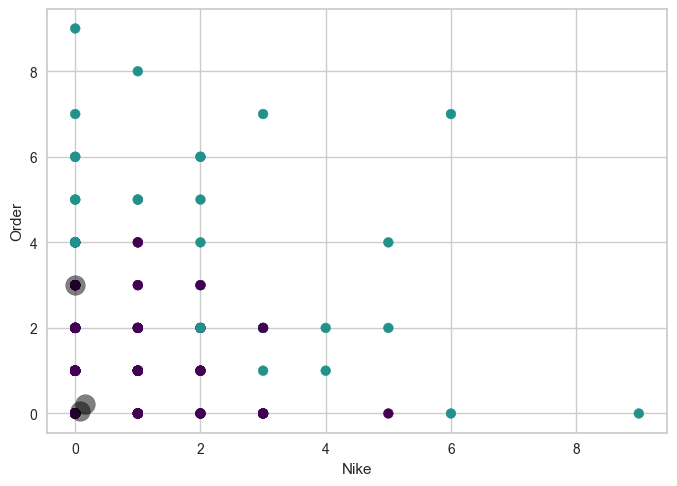

In [57]:
plt.scatter(My_Orig_DF['refund'], My_Orig_DF['order'], c=My_labels, s=50, cmap='viridis')
centers = My_KMean.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel("Nike")
plt.ylabel("Order")
plt.legend()
plt.show()

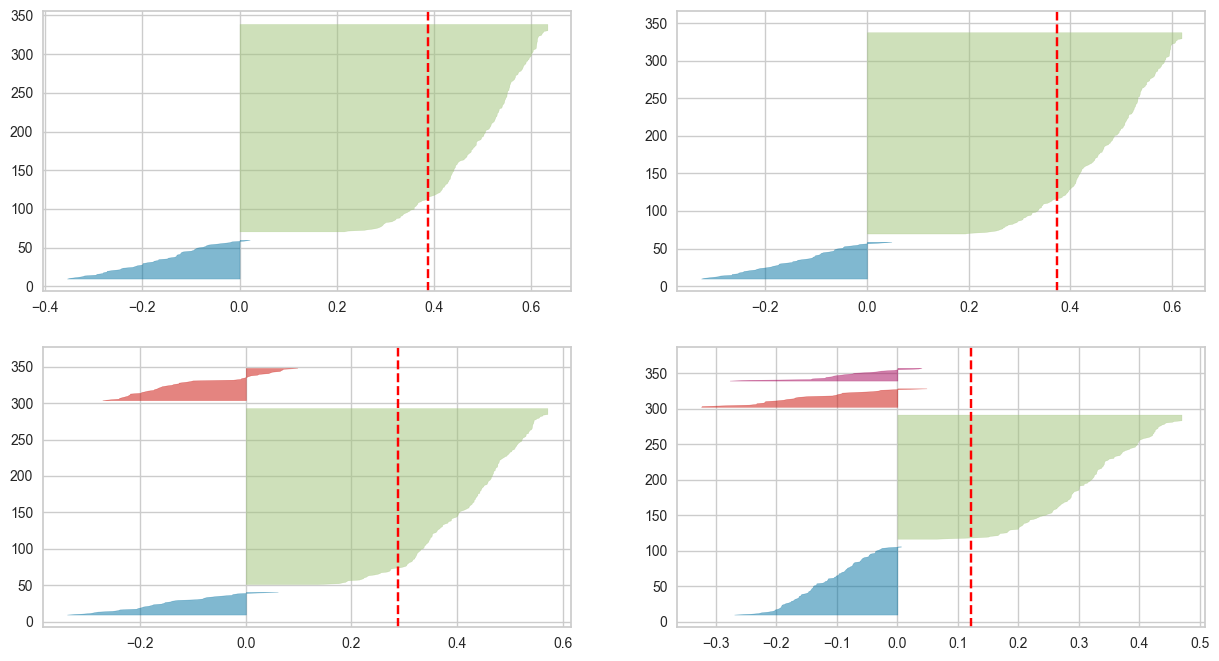

In [36]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2,2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=100)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(My_Orig_DF)

In [37]:
#pip install yellowbrick

In [49]:
kmeans_object_Count = sklearn.cluster.KMeans(n_clusters=2)
#print(kmeans_object)
kmeans_object_Count.fit(My_Orig_DF)
# Get cluster assignment labels
labels = kmeans_object_Count.labels_
prediction_kmeans = kmeans_object_Count.predict(My_Orig_DF)
#print(labels)
print(prediction_kmeans)
# Format results as a DataFrame
Myresults = pd.DataFrame([My_Orig_DF.index,labels]).T
print(Myresults)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1
 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0
 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1]
       0  1
0      0  1
1      1  1
2      2  1
3      3  1
4      4  1
..   ... ..
315  315  0
316  316  1
317  317  1
318  318  1
319  319  1

[320 rows x 2 columns]


<Figure size 1200x1200 with 0 Axes>

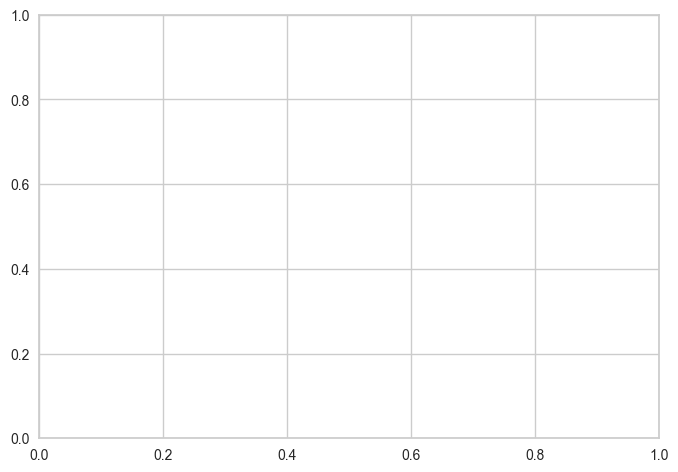

In [56]:
#print(My_Orig_DF)
DF_Count = My_Orig_DF

x=DF_Count["nike"]  ## col 1  starting from 0
y=DF_Count["refund"]    ## col 14  starting from 0
z=DF_Count["order"]  ## col 2  starting from 0
colnames=DF_Count.columns
#print(colnames)
#print(x,y,z)
fig1 = plt.figure(figsize=(12, 12))
ax1 = Axes3D(fig1, rect=[0, 0, .90, 1], elev=48, azim=134)

ax1.scatter(x,y,z, cmap="RdYlGn", edgecolor='k', s=200,c=prediction_kmeans)
ax1.w_xaxis.set_ticklabels([])
ax1.w_yaxis.set_ticklabels([])
ax1.w_zaxis.set_ticklabels([])

ax1.set_xlabel('Chocolate', fontsize=25)
ax1.set_ylabel('Hike', fontsize=25)
ax1.set_zlabel('Coffee', fontsize=25)
#plt.show()
        
centers = kmeans_object_Count.cluster_centers_
#print(centers)
#print(centers)
C1=centers[0,(1,2,14)]
#print(C1)
C2=centers[1,(1,2,14)]
#print(C2)
xs=C1[0],C2[0]
#print(xs)
ys=C1[1],C2[1]
zs=C1[2],C2[2]


ax1.scatter(xs,ys,zs, c='black', s=2000, alpha=0.2)
plt.show()
plt.cla()